In [56]:
import os
Ravdess= "RAVDESS/audio_speech_actors_01-24/"

In [57]:
import pandas as pd

In [58]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
data_path=Ravdess_df

In [59]:
data_path.head()

Emotions                                               Path
0  neutral  RAVDESS/audio_speech_actors_01-24/Actor_01/03-...
1  neutral  RAVDESS/audio_speech_actors_01-24/Actor_01/03-...
2  neutral  RAVDESS/audio_speech_actors_01-24/Actor_01/03-...
3  neutral  RAVDESS/audio_speech_actors_01-24/Actor_01/03-...
4     calm  RAVDESS/audio_speech_actors_01-24/Actor_01/03-...

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

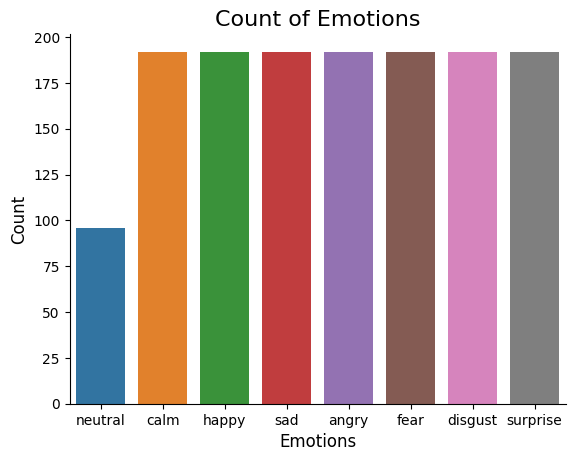

In [61]:
plt.title('Count of Emotions', size=16)
sns.countplot(x='Emotions', data=data_path)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [62]:
import librosa
import numpy as np
from IPython.display import Audio

In [63]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

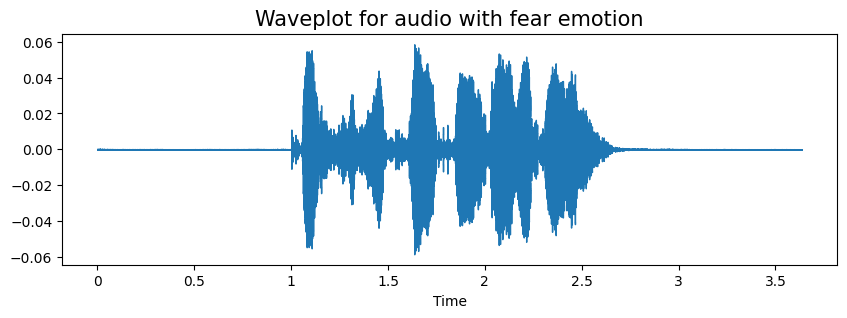

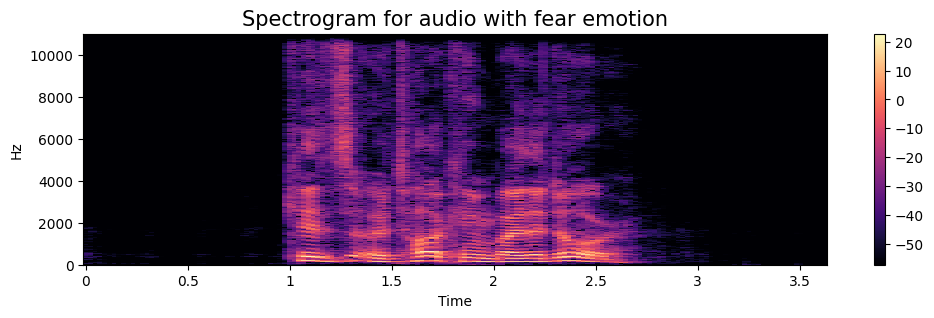

In [64]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

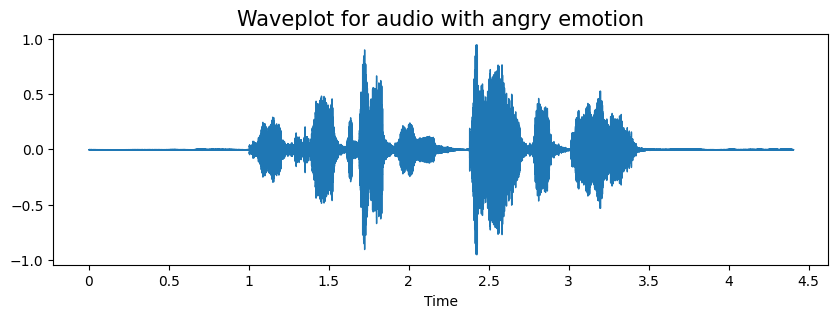

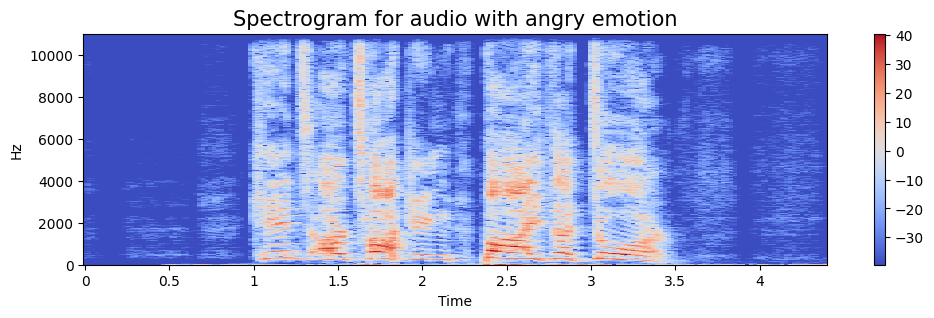

In [65]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[20]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

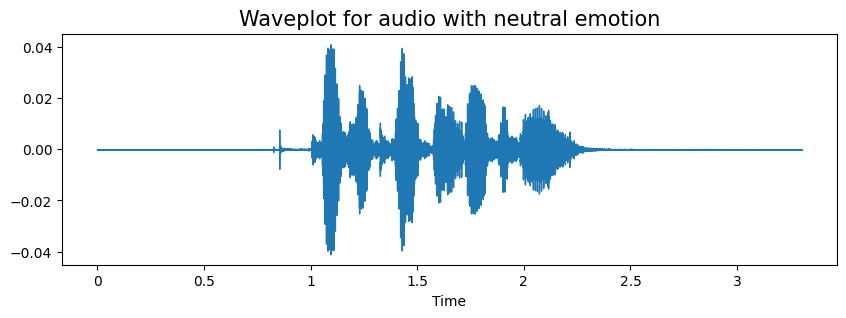

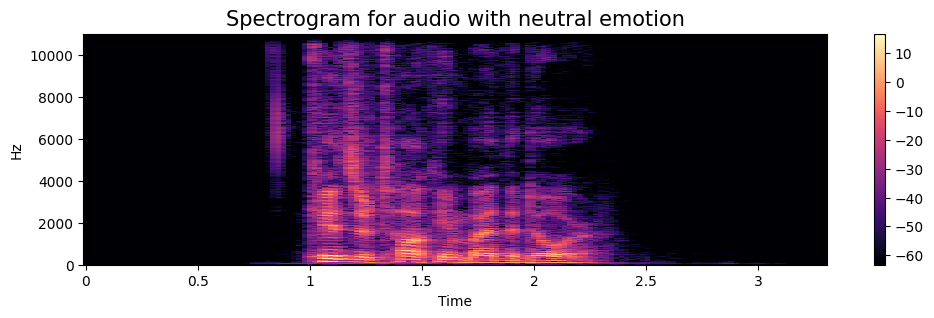

In [66]:
emotion='neutral'
path = np.array(data_path.Path[data_path.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

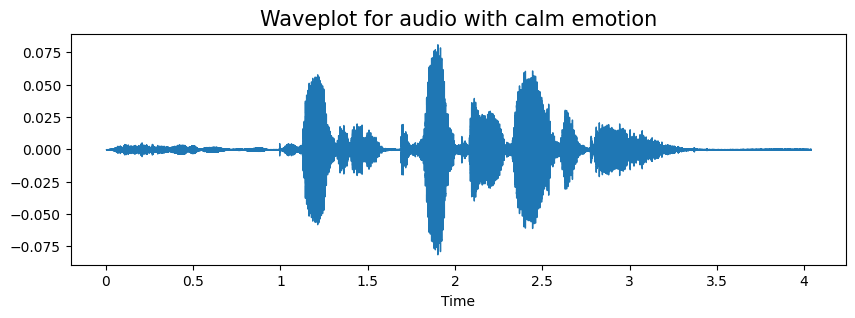

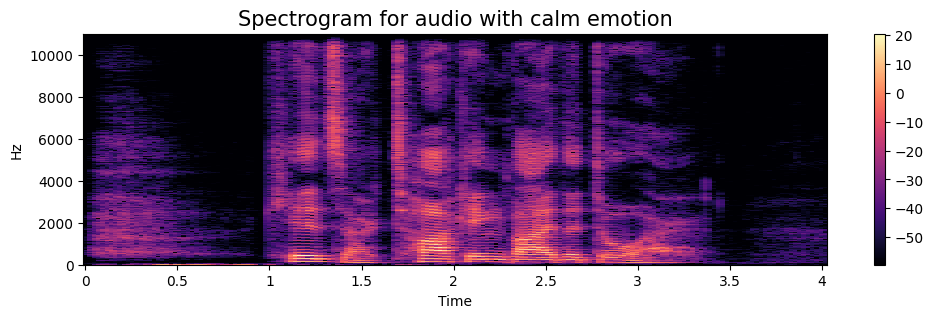

In [67]:
emotion='calm'
path = np.array(data_path.Path[data_path.Emotions==emotion])[20]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

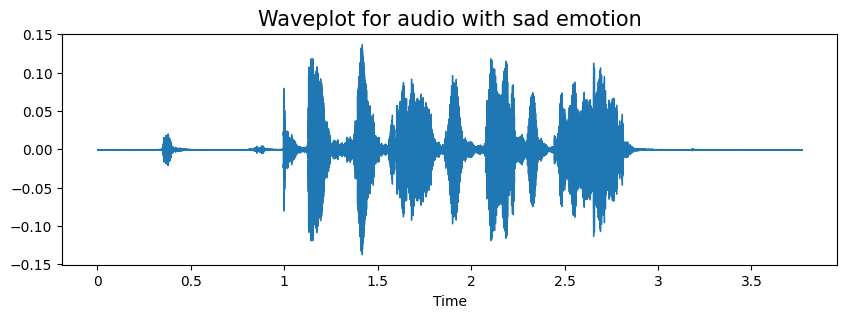

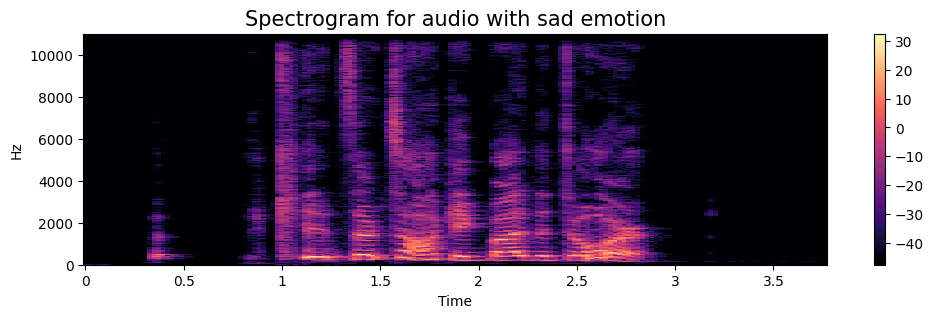

In [68]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[20]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

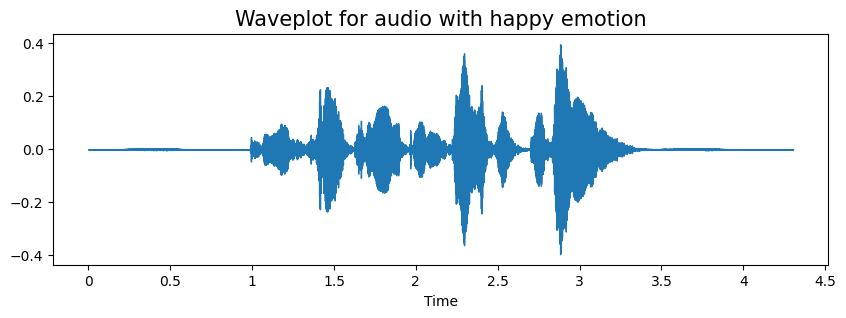

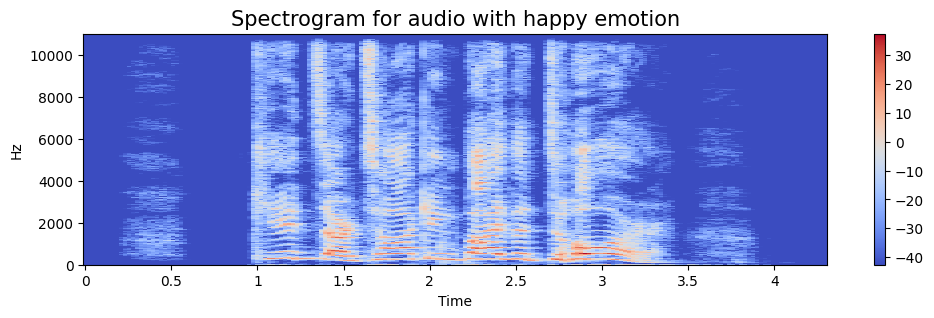

In [69]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[20]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [70]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data):
    return librosa.effects.time_stretch(data, rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=2)

# taking any example and checking for techniques.
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[20]
data, sample_rate = librosa.load(path)

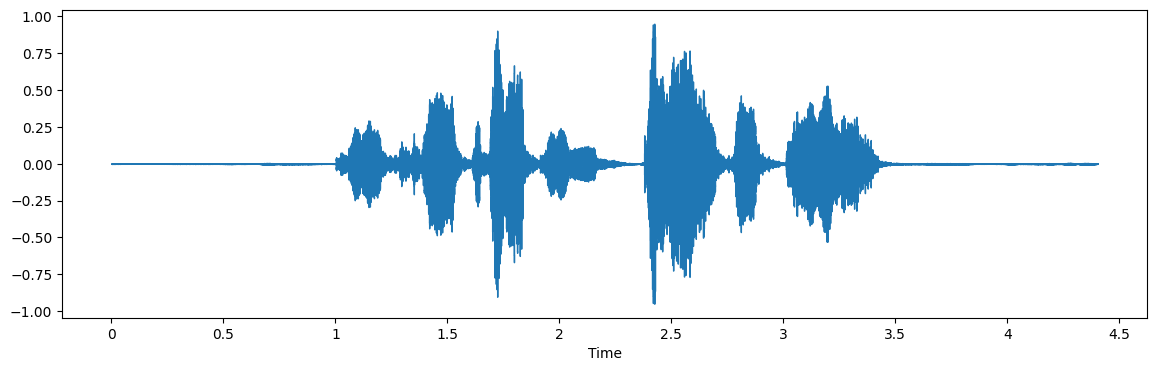

In [71]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

# noise injection

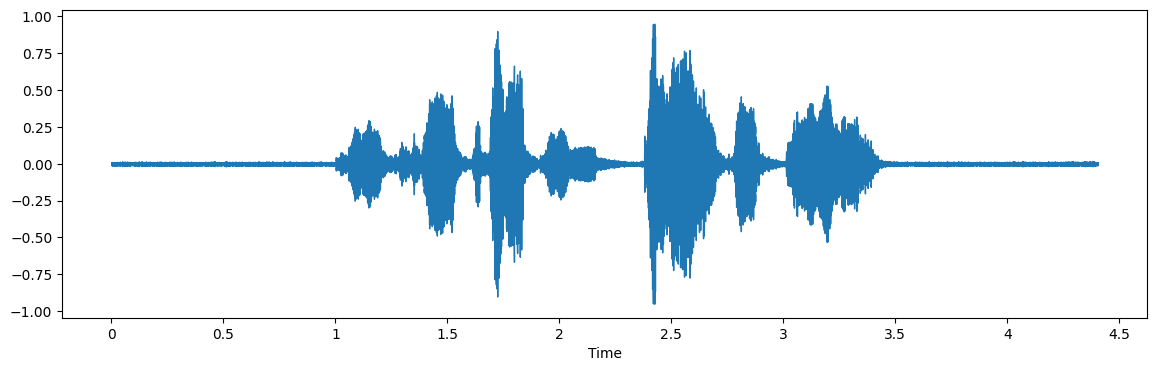

In [72]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# stretching

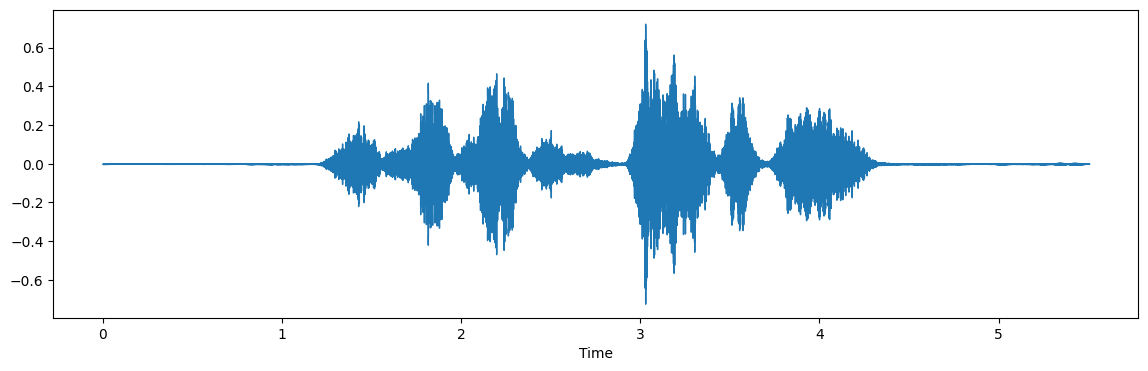

In [73]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# Shifting

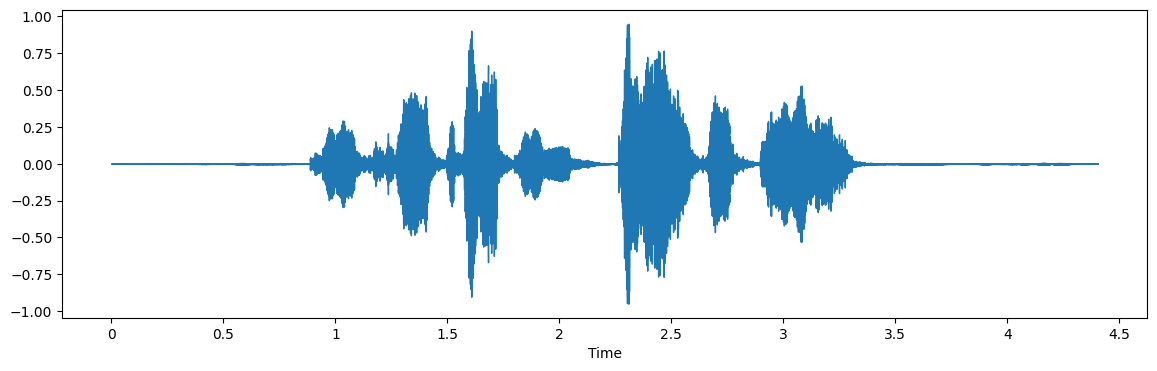

In [74]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# pitch

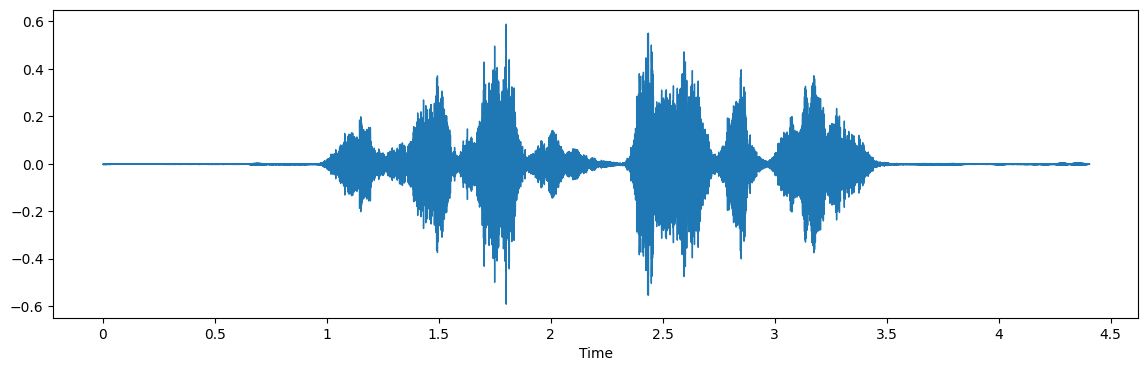

In [75]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [76]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally
    
    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

In [77]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [103]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [104]:
len(X), len(Y), data_path.Path.shape

(4320, 4320, (1440,))

In [105]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.321275  0.729664  0.750033  0.730624  0.735275  0.713529  0.660531   
1  0.305293  0.755151  0.817464  0.799102  0.797772  0.811790  0.742245   
2  0.175326  0.697448  0.648264  0.700973  0.754420  0.685841  0.654024   
3  0.293566  0.673896  0.722096  0.723508  0.682302  0.680533  0.675352   
4  0.293873  0.778043  0.801640  0.779086  0.757539  0.767311  0.699006   

          7         8         9  ...           153           154  \
0  0.684966  0.733049  0.753972  ...  4.310903e-06  3.291511e-06   
1  0.675458  0.710801  0.751662  ...  3.006358e-05  2.922147e-05   
2  0.673897  0.660135  0.670811  ...  9.860186e-07  5.285366e-07   
3  0.628977  0.679179  0.707283  ...  6.984504e-06  7.034949e-06   
4  0.636661  0.700340  0.734202  ...  2.340712e-05  2.478538e-05   

            155           156       157           158           159  \
0  2.148075e-06  2.279739e-06  0.000005  8.190282e-06  7.024454e-06   
1  2.831552e-05  2.915966e-05  0.000032  3.614303e-05  3.473785e-05   
2  8.273391e-07  6.289396e-07  0.000001  5.300839e-07  4.321551e-07   
3  6.654923e-06  6.979548e-06  0.000012  9.640183e-06  1.096403e-05   
4  2.323368e-05  2.216322e-05  0.000028  2.713107e-05  2.781102e-05   

            160           161   labels  
0  5.051210e-06  4.245834e-07  neutral  
1  3.329594e-05  2.839256e-05  neutral  
2  1.911253e-07  2.231159e-08  neutral  
3  5.543237e-06  4.254087e-07  neutral  
4  2.259154e-05  1.758274e-05  neutral  

[5 rows x 163 columns]

In [106]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [107]:
# As this is a multiclass classification problem onehotencoding our Y.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [108]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162), (3240, 8), (1080, 162), (1080, 8))

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162), (3240, 8), (1080, 162), (1080, 8))

In [110]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162, 1), (3240, 8), (1080, 162, 1), (1080, 8))

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 162, 256)          1536      
                                                                 
 max_pooling1d_23 (MaxPooli  (None, 81, 256)           0         
 ng1D)                                                           
                                                                 
 conv1d_25 (Conv1D)          (None, 81, 256)           327936    
                                                                 
 max_pooling1d_24 (MaxPooli  (None, 41, 256)           0         
 ng1D)                                                           
                                                                 
 conv1d_26 (Conv1D)          (None, 41, 128)           163968    
                                                                 
 max_pooling1d_25 (MaxPooli  (None, 21, 128)          

In [112]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=200, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/200
51/51 [==============================] - 8s 138ms/step - loss: 2.0218 - accuracy: 0.1809 - val_loss: 1.9341 - val_accuracy: 0.1870 - lr: 0.0010
Epoch 2/200
51/51 [==============================] - 7s 131ms/step - loss: 1.9598 - accuracy: 0.2241 - val_loss: 1.8646 - val_accuracy: 0.2694 - lr: 0.0010
Epoch 3/200
51/51 [==============================] - 7s 136ms/step - loss: 1.8839 - accuracy: 0.2599 - val_loss: 1.7674 - val_accuracy: 0.3176 - lr: 0.0010
Epoch 4/200
51/51 [==============================] - 8s 149ms/step - loss: 1.8361 - accuracy: 0.2809 - val_loss: 1.7168 - val_accuracy: 0.3759 - lr: 0.0010
Epoch 5/200
51/51 [==============================] - 8s 151ms/step - loss: 1.7838 - accuracy: 0.3136 - val_loss: 1.7135 - val_accuracy: 0.3491 - lr: 0.0010
Epoch 6/200
51/51 [==============================] - 8s 151ms/step - loss: 1.7359 - accuracy: 0.3398 - val_loss: 1.5994 - val_accuracy: 0.4231 - lr: 0.0010
Epoch 7/200
51/51 [==============================] - 8s 151ms/st

34/34 [==============================] - 1s 17ms/step - loss: 2.2403 - accuracy: 0.6389
Accuracy of our model on test data :  63.88888955116272 %


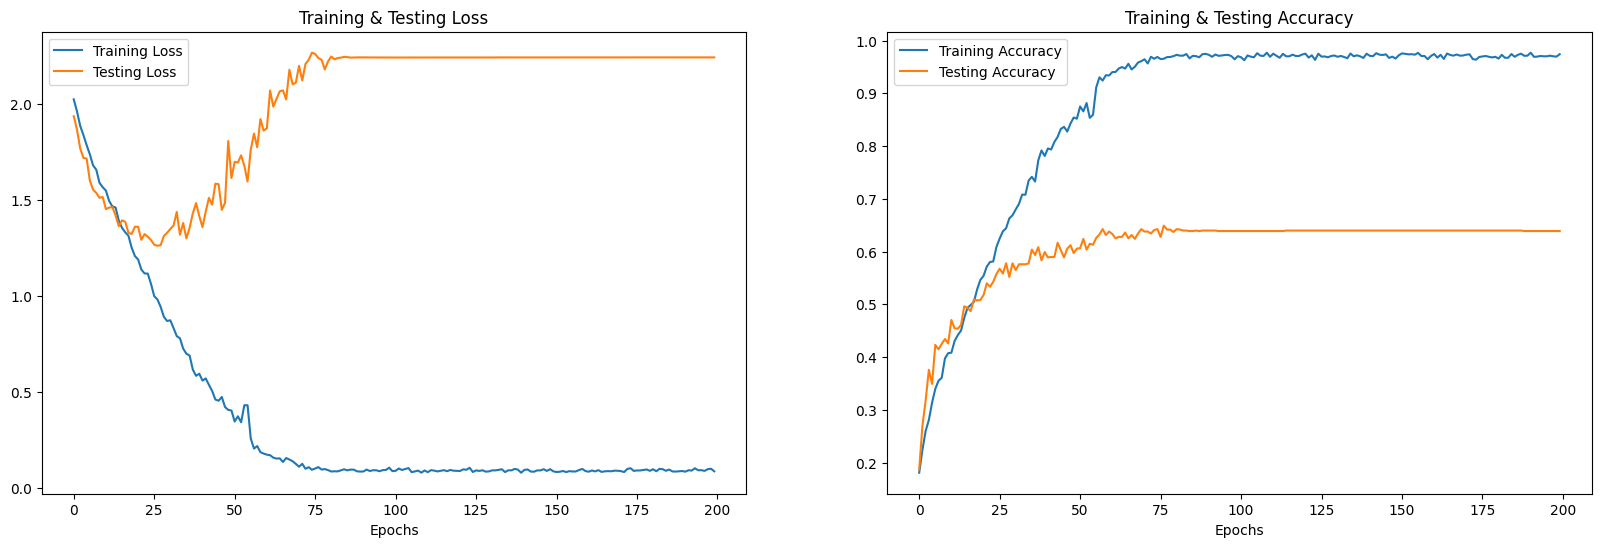

In [113]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(200)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [114]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

34/34 [==============================] - 1s 17ms/step


In [115]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0             fear          fear
1             fear         angry
2             fear          fear
3             calm          calm
4            happy         angry
5         surprise      surprise
6             fear          fear
7             fear         happy
8             fear          fear
9              sad           sad

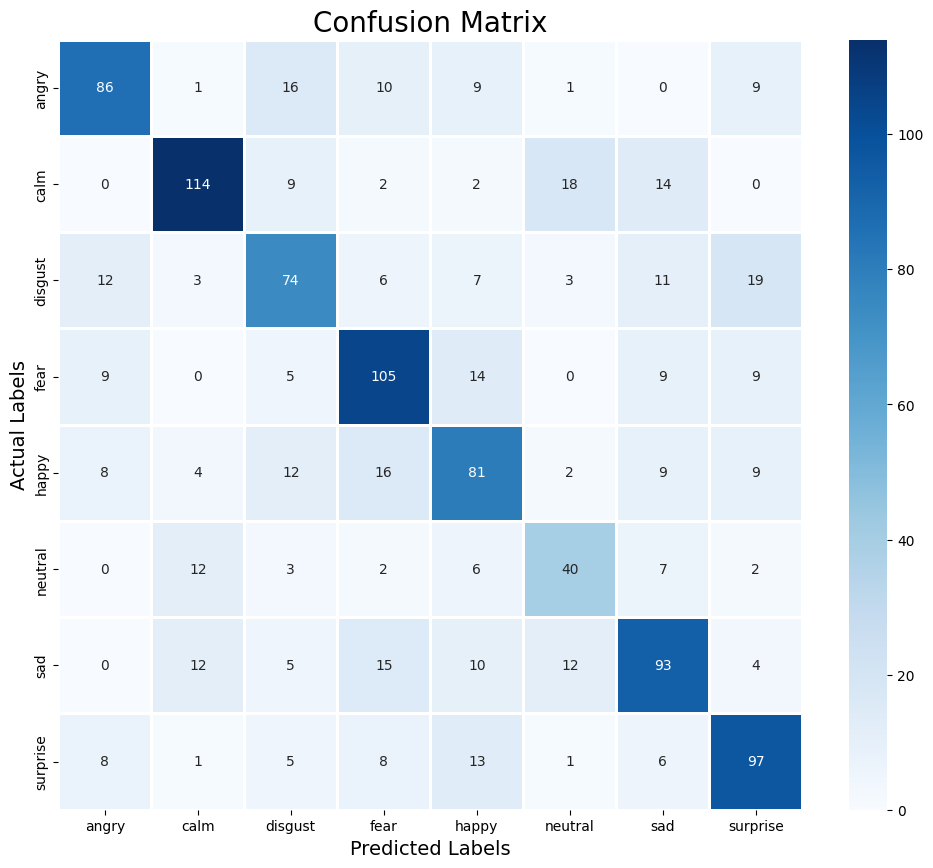

In [116]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.70      0.65      0.67       132
        calm       0.78      0.72      0.75       159
     disgust       0.57      0.55      0.56       135
        fear       0.64      0.70      0.67       151
       happy       0.57      0.57      0.57       141
     neutral       0.52      0.56      0.54        72
         sad       0.62      0.62      0.62       151
    surprise       0.65      0.70      0.67       139

    accuracy                           0.64      1080
   macro avg       0.63      0.63      0.63      1080
weighted avg       0.64      0.64      0.64      1080

